    name  sem   age  height  marks  study_hrs
0  Rahul    2  19.0   170.0   78.0        4.0
1  Priya    2  20.0   160.0   85.0        6.0
2   Amit    3   NaN   175.0   92.0        NaN
3  Sneha    2  19.0     NaN   60.0        2.0
4  Karan    3  22.0   172.0    NaN        6.0
sem
2    3
3    2
Name: count, dtype: int64
    name  sem   age  height  marks  study_hrs
0  Rahul    2  19.0  170.00  78.00        4.0
1  Priya    2  20.0  160.00  85.00        6.0
2   Amit    3  20.0  175.00  92.00        4.5
3  Sneha    2  19.0  169.25  60.00        2.0
4  Karan    3  22.0  172.00  78.75        6.0
Upper bound: 106.625
Lower bound: 53.625
    name  sem   age  height  marks  study_hrs
0  Rahul    2  19.0   170.0   78.0        4.0
1  Priya    2  20.0   160.0   85.0        6.0
2   Amit    3   NaN   175.0   92.0        NaN
3  Sneha    2  19.0     NaN   60.0        2.0
Outliers in marks:
Series([], Name: marks, dtype: float64)
Outliers in study hours:
Series([], Name: study_hrs, dtype: float64)


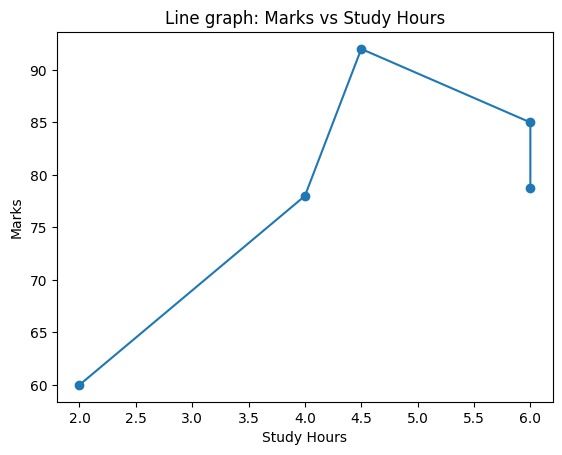

Correlation between marks and study hours: 0.7171600817312187


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = {
    "name": ["Rahul", "Priya", "Amit", "Sneha", "Karan"],
    "sem": [2, 2, 3, 2, 3],
    "age": [19, 20, np.nan, 19, 22],
    "height": [170, 160, 175, np.nan, 172],
    "marks": [78, 85, 92, 60, np.nan],
    "study_hrs": [4, 6, np.nan, 2, 6]
}
df = pd.DataFrame(d)
print(df)

# Number of students in each semester
print(df["sem"].value_counts())


# Fill all null values
df_filled = df.fillna(df.mean(numeric_only=True))
print(df_filled)


# Outliers using IQR 
q1 = df["marks"].quantile(0.25)
q3 = df["marks"].quantile(0.75)
iqr = q3 - q1

upp = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

print("Upper bound:", upp)
print("Lower bound:", low)

df = df[
    (df["marks"] >= low) &(df["marks"] <= upp)]
print(df)


# Outliers using Z-score
z_marks = np.abs((df["marks"] - df["marks"].mean()) / df["marks"].std())
z_hrs = np.abs((df["study_hrs"] - df["study_hrs"].mean()) / df["study_hrs"].std())

print("Outliers in marks:")
print(df["marks"][z_marks > 3])

print("Outliers in study hours:")
print(df["study_hrs"][z_hrs > 3])


#Sorting Values
df_sorted = df_filled.sort_values("study_hrs")

# Line graph: Marks vs Study Hours
plt.plot(df_sorted["study_hrs"], df_sorted["marks"], marker='o')
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Line graph: Marks vs Study Hours")
plt.show()

# Correlation
correlation = df_filled["marks"].corr(df_filled["study_hrs"])
print("Correlation between marks and study hours:", correlation)